In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx

In [2]:
neuronas = np.power(12,2)
neuronas_sqrt = np.sqrt(neuronas)
w = np.zeros([neuronas, neuronas])

for i in tqdm(range(neuronas)):
    for j in range(neuronas):
        if (i == j-1 and (j%neuronas_sqrt != 0)) or (i == j+1 and (i%neuronas_sqrt != 0)) or (i == j-neuronas_sqrt) or (i == j+neuronas_sqrt):
            w[i,j] = 1            
#print(w)

100%|██████████| 144/144 [00:00<00:00, 4524.74it/s]


100%|██████████| 144/144 [00:00<00:00, 12759.69it/s]


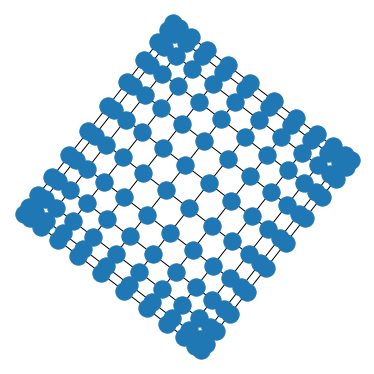

In [3]:
G=nx.Graph()
G.add_nodes_from(np.arange(neuronas))
for k1 in tqdm(range(neuronas)):
  for k2 in range(neuronas):
    if (w[k1, k2] == 1) :
      G.add_edges_from([(k1,k2)], weight=1)      

fig = plt.figure(figsize = (5,5))
nx.draw_spectral(G)
plt.show()

In [4]:
cambios = 500 #por neuronas
h_ext = 0
k_boltzmann = 1
T = np.arange(0.1, 5, 0.1)
x = range(cambios * neuronas)
S_medio_final = np.zeros(T.shape)

for m, t_i in tqdm(enumerate(T)):
  S = np.random.choice([1, -1], size=[1, neuronas])
  S_medio = np.zeros([cambios * neuronas])
  H = np.zeros([cambios * neuronas])
  for k in x:
      #elijo un subindice para crear un S auxiliar
      i = np.random.choice(np.arange(neuronas))
      S_aux = np.copy(S)
      S_aux[0, i] = -1 * S_aux[0, i]
      
      # computo los h
      H[k] = -(1/2) * np.dot(S, np.dot(w, np.transpose(S))) - h_ext * np.sum(S)
      H_aux = -(1/2) * np.dot(S_aux, np.dot(w, np.transpose(S_aux))) - h_ext * np.sum(S)
      
      #calculo la diferencia entre h y h_aux
      dH = (H_aux - H[k])    
      
      #me quedo con el S auxiliar bajo ciertas condiciones
      prob = np.power(np.e, (-dH)/(k_boltzmann * t_i))
      if (dH<0) or (random.random() < prob) :
          S = np.copy(S_aux)      
      
      #calculo la media de S
      S_medio[k] = np.mean(S)
  S_medio_final[m] = S_medio[k]

49it [07:44,  9.49s/it]


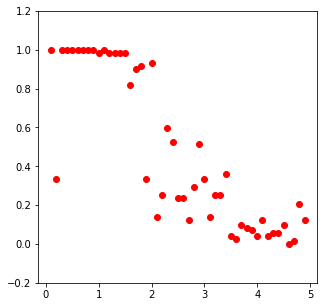

In [9]:
fig = plt.figure(figsize = (5,5))
plt.plot(T, np.abs(S_medio_final), 'ro')
plt.ylim(-0.2, 1.2)
plt.show()

In [11]:
"""
fig = plt.figure(figsize = (12, 4))
plt.subplot(1,2,1)
plt.plot(x, H)
plt.subplot(1,2,2)
plt.plot(x, S_medio)
plt.ylim(-1, 1)
plt.show()
"""

'\nfig = plt.figure(figsize = (12, 4))\nplt.subplot(1,2,1)\nplt.plot(x, H)\nplt.subplot(1,2,2)\nplt.plot(x, S_medio)\nplt.ylim(-1, 1)\nplt.show()\n'